In [1]:
import pandas as pd
import re
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

In [2]:
def graph_loss(filename):
    with open(filename, 'r') as f:
        lines = []
        for line in f.readlines():
            matches = re.match('^\* LOSS - (\d.\d\d\d)', line.strip())
            if matches:
                lines.append({'loss': matches.group(1)})
        df = pd.DataFrame(lines, dtype=float)
        print(df.describe())
        print()

        df['min'] = df.loss.min()
        df['0.974'] = 0.974
        print('Min Loss: {} Index: {} Last: {}'.format(
                    df.loss.min(), df.loss.idxmin(), lines[-1]['loss']))
        return (len(lines), df)

             loss
count  500.000000
mean     1.083414
std      0.081430
min      0.970000
25%      0.994000
50%      1.111000
75%      1.143250
max      1.356000

Min Loss: 0.97 Index: 425 Last: 0.983


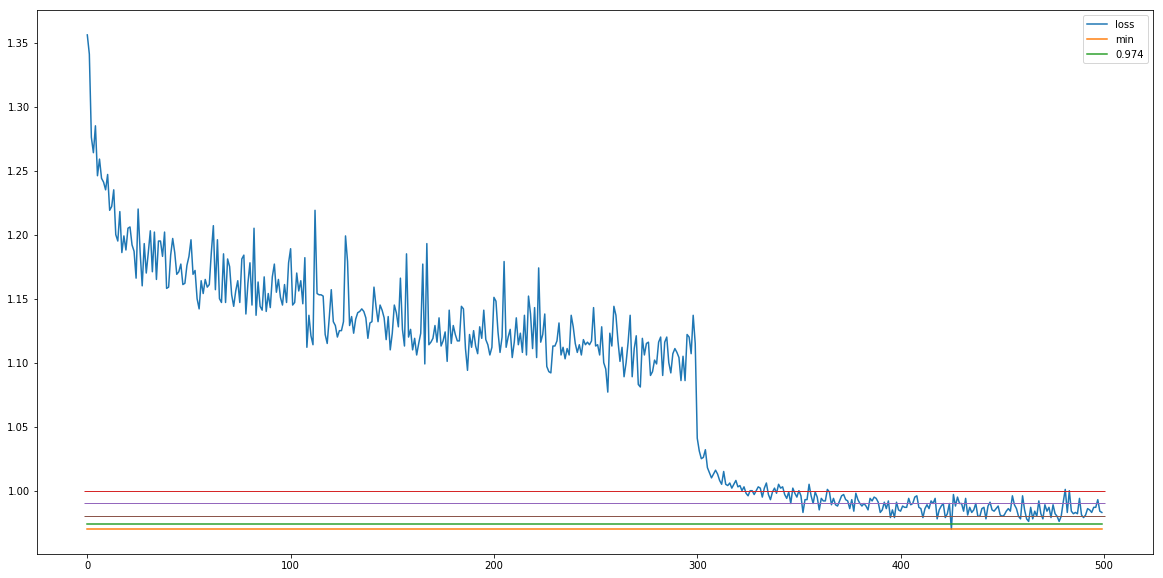

In [3]:
# prev_num = 0
# n = 10
# i = 0
#while True:
# i += 1
# clear_output(wait=True)
_, df = graph_loss('train.log')
df.plot(figsize=(20, 10))
plt.plot(range(df.shape[0]), [1]*df.shape[0], '_')
plt.plot(range(df.shape[0]), [0.99]*df.shape[0], '_')
plt.plot(range(df.shape[0]), [0.98]*df.shape[0], '_')
plt.show() 


# if prev_num == num_loss:
#     if i == n:
#         break
# else:
#     i = 0

#prev_num = num_loss
#    time.sleep(60)